In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic=pd.read_csv("/kaggle/input/datasets/fatuzahra/titanic/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
cabin_dropped= titanic.drop(columns="Cabin")
cabin_dropped.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [5]:
cabin_dropped["Age"].fillna(
    cabin_dropped["Age"].mean(),inplace=True
)
cabin_dropped.isnull().sum()

/tmp/ipykernel_17/3133985530.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cabin_dropped["Age"].fillna(


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [6]:
cabin_dropped["Embarked"].fillna(
    cabin_dropped["Embarked"].mode()[0], inplace=True
)
cabin_dropped.isnull().sum()

/tmp/ipykernel_17/3271196257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cabin_dropped["Embarked"].fillna(


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
# now we have to deal with the outliers(extreme, impossible values)

# for this we use visualization to see if there actuall are any outliers

# we must import matplotlib.pyplot and seaborn for visualization


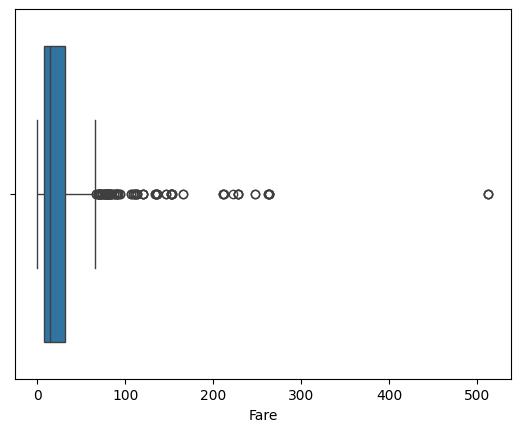

In [8]:
# data visualization

# boxplot helps us see if there are any outliers:

plt.figure()
sns.boxplot(x=cabin_dropped["Fare"])
plt.show()

#all the dots/points are the outliers

In [9]:
#it is important to remove the outliers, we can use the IQR method to remove the outliers

# in the IQR method, we specify the IQR value, lower bound(minimum) and upper bound(maximum) values
# the IQR is Q3-Q1
# Q1 is the 25th percentile
# Q3 is the 75th percentile
# lower bound is Q1-1.5*IQR
# upper bound is Q3+1.5*IQR

In [10]:
# so calculating Q1 and Q3

Q1=cabin_dropped["Fare"].quantile(0.25) #as it's the 25th percentile
Q3=cabin_dropped["Fare"].quantile(0.75) #as it's the 75th percentile

print(Q1)
print(Q3)

7.9104
31.0


In [11]:
# calculating IQR 

IQR=Q3-Q1

print(IQR)

23.0896


In [12]:
# calculating lower and upper bound

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

print(lower_bound)
print(upper_bound)

-26.724
65.6344


In [13]:
# the outliers lie outside the upper and lower bounds
# so in order to remove the outliers, we must choose the values that lie within the bounds

titanic_clean=cabin_dropped[
(cabin_dropped["Fare"]>=lower_bound)&(cabin_dropped["Fare"]<=upper_bound)
]

#now we can visibly see that the outlier data was dropped

titanic_clean.shape

(775, 11)

In [14]:
titanic_clean.info()

titanic_clean.info

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  775 non-null    int64  
 1   Survived     775 non-null    int64  
 2   Pclass       775 non-null    int64  
 3   Name         775 non-null    object 
 4   Sex          775 non-null    object 
 5   Age          775 non-null    float64
 6   SibSp        775 non-null    int64  
 7   Parch        775 non-null    int64  
 8   Ticket       775 non-null    object 
 9   Fare         775 non-null    float64
 10  Embarked     775 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 72.7+ KB


<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                             Name     Sex        Age  SibSp  \
0                         Braund, Mr. Owen Harris    male  22.000000      1   
2                          Heikkinen, Miss. Laina  female  26.000000      0   
3    Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000      1   
4                        Allen, Mr. William Henry    male  35.000000      0   
5                                Moran, Mr. James    male  29.699118      0   
..                                   

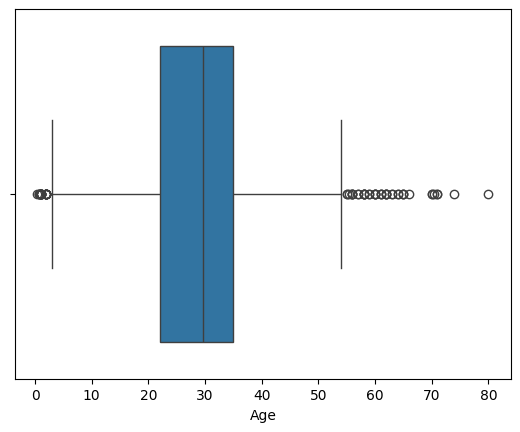

In [15]:
# the Age feature has outliers as well

plt.figure()
sns.boxplot(x=cabin_dropped["Age"])
plt.show()

In [16]:
Q1=cabin_dropped["Age"].quantile(0.25) #as it's the 25th percentile
Q3=cabin_dropped["Age"].quantile(0.75) #as it's the 75th percentile

print(Q1)
print(Q3)

IQR=Q3-Q1

print(IQR)

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

print(lower_bound)
print(upper_bound)

titanic_clean=cabin_dropped[
(cabin_dropped["Age"]>=lower_bound)&(cabin_dropped["Age"]<=upper_bound)
]

#now we can visibly see that the outlier data was dropped

titanic_clean.shape

22.0
35.0
13.0
2.5
54.5


(825, 11)

In [17]:
# another issue that the dataset can have is having duplicate rows
# it is important to remove these duplicate value to make the predictions accurate

duplicated_rows= titanic_clean.duplicated().sum()
print(duplicated_rows)

0


In [18]:
# there are no duplicate rows in our dataset, however if we ever come across duplicate rows
# we can remove them by thee following method

print(f"Before: {len(titanic_clean)}")
titanic.drop_duplicates(inplace=True)
print(f"After: {len(titanic_clean)}")

Before: 825
After: 825


In [19]:
# data visualization helps us
# understand data patterns
# detect outliers
# compare data distribution
# decision making

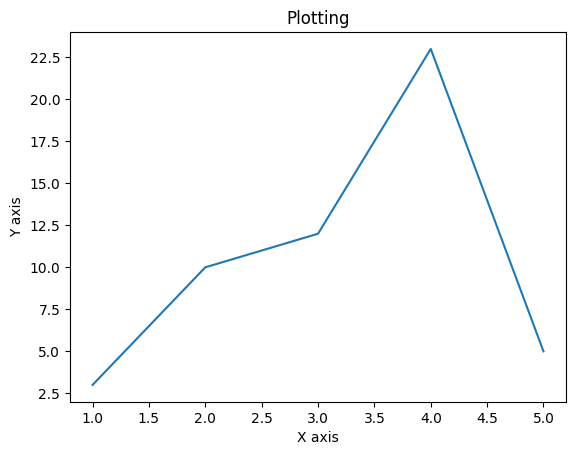

In [20]:
# for example

x=[1,2,3,4,5]
y=[3,10,12,23,5]

plt.figure()
plt.plot(x,y)
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Plotting")
plt.show()

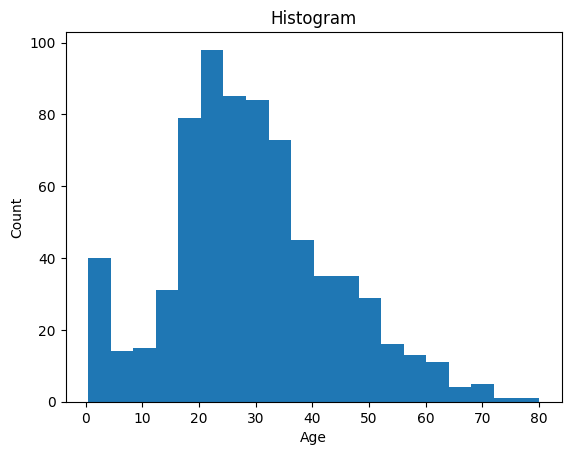

In [21]:
# histogram shows data distribution in features
# dropna() is used because histogram cannot deal with missing values, so they are dropped
# bins means intervals or how many bars will be shown in the figure
plt.figure()
plt.hist(titanic["Age"].dropna(),bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

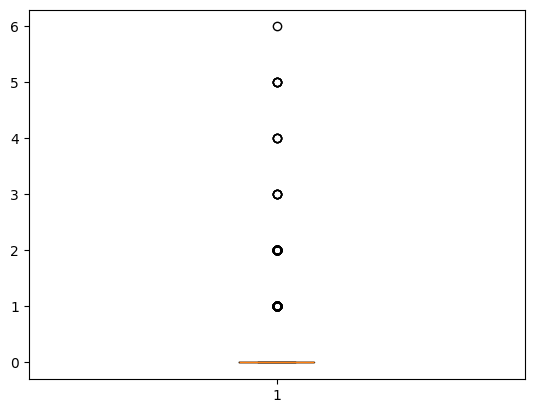

In [22]:
# boxplot helps us see if there are any outliers
plt.figure()
plt.boxplot(x=cabin_dropped["Parch"])
plt.show


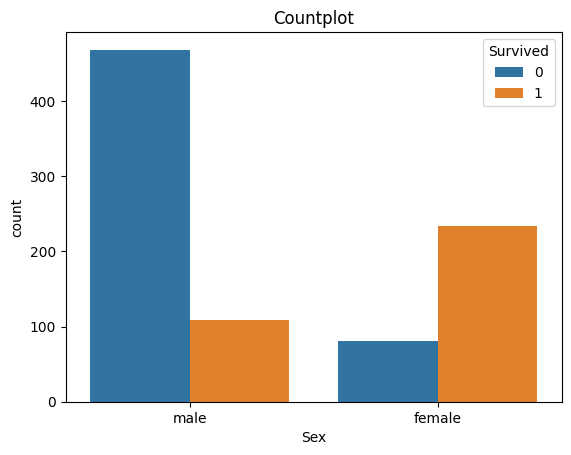

In [23]:
sns.countplot(x="Sex",hue="Survived",data=titanic)
plt.title("Countplot")
plt.show()

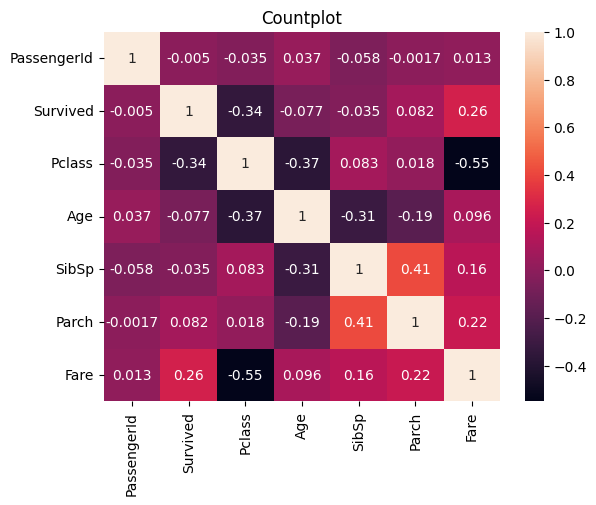

In [24]:
# correlation heatmaps help see relationship of each feature with all the other features
# for numerical features only, hence why we used numeric_only=True

corr=titanic.corr(numeric_only=True)
plt.figure
sns.heatmap(corr,annot=True)
plt.title("Countplot")
plt.show()

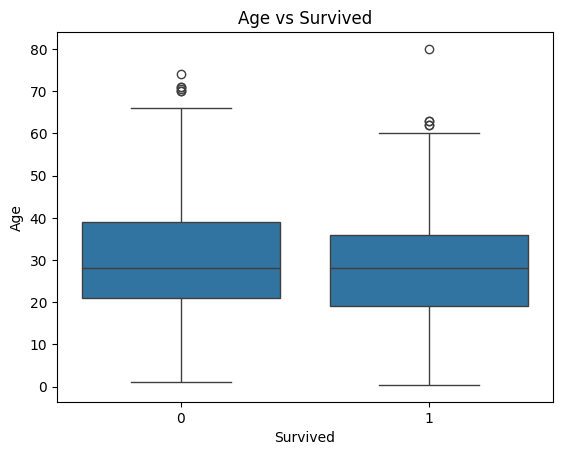

In [25]:
# we can also plot a boxplot between the data of two diff features

sns.boxplot(x="Survived",y="Age",data=titanic)
plt.title("Age vs Survived")
plt.show()

In [26]:
# if the distribution of data is not proper it means that the data is skewed
# it is either left-skewed (more data on the left)
# or right skewed (more data on the right)